<a href="https://colab.research.google.com/github/AdiDev1411/Machine-learning/blob/main/AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [5]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

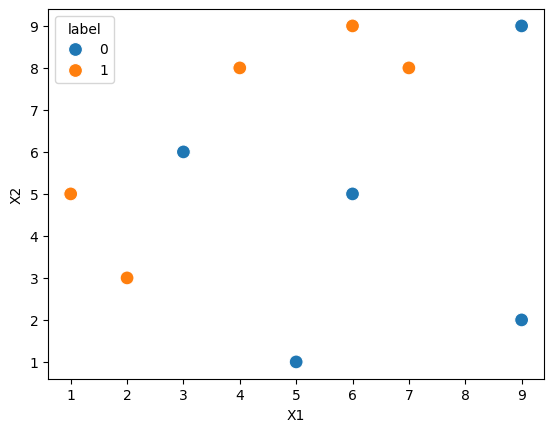

In [6]:
sns.scatterplot( x = df['X1'] , y = df['X2'] , hue=df['label'] , s=100)

In [7]:
# give every row equal weights
df['weights'] = 1/df.shape[0]

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt1 = DecisionTreeClassifier(max_depth=1) # maxdepth should be 1 cause in boosting it is stemp

In [10]:
X = df.iloc[:,0:2]
y = df.iloc[:,2]

In [11]:
#step 2 train 1st model
dt1.fit(X ,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

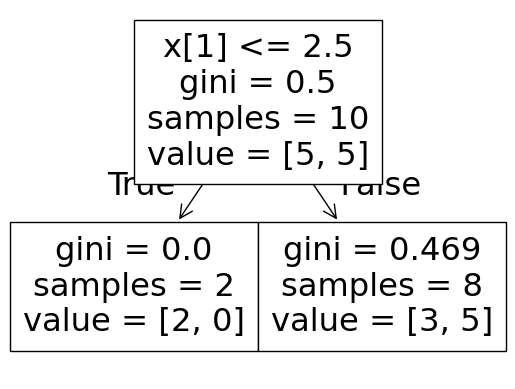

In [12]:
from sklearn.tree import plot_tree
plot_tree(dt1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

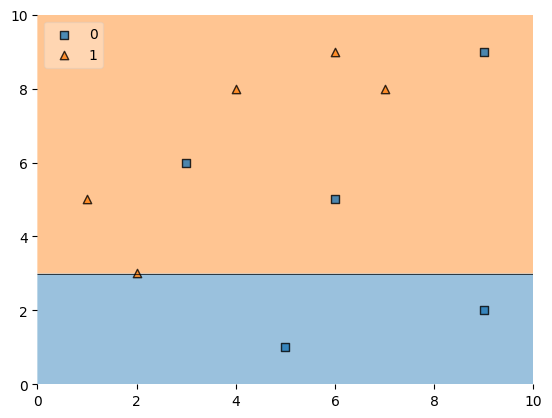

In [13]:
plot_decision_regions( X.values , y.values , clf=dt1 , legend=2)

In [14]:
df['y_pred'] = dt1.predict(X)

In [15]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [16]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/error)

In [17]:
alpha1 = calculate_model_weight(0.3)
alpha1

np.float64(0.42364893019360184)

In [19]:
def update_row_weights(row  , alpha = alpha1):
  if row['label']==row['y_pred'] :
    return row['weights'] * np.exp(-alpha)

  else:
    return row['weights'] * np.exp(alpha)


In [22]:
df['updated_rows'] = df.apply(update_row_weights,axis=1)

In [23]:
df

,X1,X2,label,weights,y_pred,updated_rows
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,1,0.152753
3,4,8,1,0.1,1,0.065465
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,1,0.065465
6,6,5,0,0.1,1,0.152753
7,7,8,1,0.1,1,0.065465
8,9,9,0,0.1,1,0.152753
9,9,2,0,0.1,0,0.065465


In [25]:
df['updated_rows'].sum()

np.float64(0.9165151389911682)

In [26]:
df['normalized_weights'] = df['updated_rows']/df['updated_rows'].sum()

In [27]:
df

,X1,X2,label,weights,y_pred,updated_rows,normalized_weights
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,1,0.152753,0.166667
3,4,8,1,0.1,1,0.065465,0.071429
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,1,0.065465,0.071429
6,6,5,0,0.1,1,0.152753,0.166667
7,7,8,1,0.1,1,0.065465,0.071429
8,9,9,0,0.1,1,0.152753,0.166667
9,9,2,0,0.1,0,0.065465,0.071429


In [33]:
df['normalized_weights'].sum()

np.float64(0.9999999999999999)

In [34]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [35]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
df

,X1,X2,label,weights,y_pred,updated_rows,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.071429,0.142857,0.071429
2,3,6,0,0.1,1,0.152753,0.166667,0.309524,0.142857
3,4,8,1,0.1,1,0.065465,0.071429,0.380952,0.309524
4,5,1,0,0.1,0,0.065465,0.071429,0.452381,0.380952
5,6,9,1,0.1,1,0.065465,0.071429,0.523810,0.452381
6,6,5,0,0.1,1,0.152753,0.166667,0.690476,0.523810
7,7,8,1,0.1,1,0.065465,0.071429,0.761905,0.690476
8,9,9,0,0.1,1,0.152753,0.166667,0.928571,0.761905
9,9,2,0,0.1,0,0.065465,0.071429,1.000000,0.928571


In [36]:
def create_newdf(df):
  indices=[]

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper']> a and a>row['cumsum_lower']:
        indices.append(index)

  return indices

In [38]:
index_values = create_newdf(df)
index_values

[1, 0, 1, 0, 5, 8, 9, 6, 8, 4]

In [39]:
second_df = df.iloc[index_values , [0,1,2,3]]
second_df

,X1,X2,label,weights
1,2,3,1,0.1
0,1,5,1,0.1
1,2,3,1,0.1
0,1,5,1,0.1
5,6,9,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1


In [42]:
X = second_df.iloc[:,:2]
y = second_df.iloc[:,2]

In [40]:
df2 = DecisionTreeClassifier(max_depth=1)

In [43]:
df2.fit(X , y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 3.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.625, 0.5, '  False')]

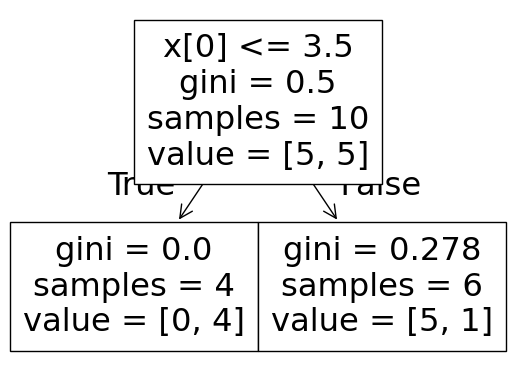

In [45]:
plot_tree(df2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

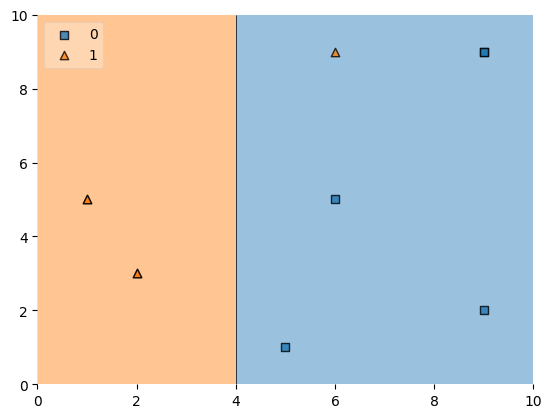

In [47]:
plot_decision_regions(X.values,y.values,clf=df2 , legend=2)

🔁 AdaBoost Process (in short):

**Initialize Weights**

* Assign equal weights to all training samples.





**Train Weak Learner**

* Train a weak model (like a small decision tree) on the weighted data.

**Calculate Error**

* Compute the error rate of the weak learner (higher weight for misclassified points).

**Compute Learner's Weight**

* Assign a weight to the learner: more accurate = higher weight.

**Update Sample Weights**

* Increase weights for misclassified samples (hard ones), decrease for correct ones.

**Repeat**

* Repeat steps 2–5 for a number of rounds or until performance is good.

**Final Model**

* Combine all weak learners using their weights into a strong classifier